In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv('fvc.csv')
df

,ACCIDENT_NO,VEHICLE_ID,VEHICLE_YEAR_MANUF,VEHICLE_DCA_CODE,INITIAL_DIRECTION,ROAD_SURFACE_TYPE,ROAD_SURFACE_TYPE_DESC,REG_STATE,VEHICLE_BODY_STYLE,VEHICLE_MAKE,...,TRAILER_TYPE,VEHICLE_COLOUR_1,VEHICLE_COLOUR_2,CAUGHT_FIRE,INITIAL_IMPACT,LAMPS,LEVEL_OF_DAMAGE,TOWED_AWAY_FLAG,TRAFFIC_CONTROL,TRAFFIC_CONTROL_DESC
0,T20120000009,A,1996.0,1.0,E,1.0,Paved,V,SEDAN,HOLDEN,...,H,WHI,ZZ,2.0,1,1.0,5,1.0,0.0,No control
1,T20120000012,A,2002.0,1.0,W,1.0,Paved,V,SEDAN,HOLDEN,...,H,BLU,ZZ,2.0,1,1.0,2,2.0,1.0,Stop-go lights
2,T20120000012,B,1988.0,2.0,S,1.0,Paved,V,SEDAN,TOYOTA,...,H,WHI,ZZ,2.0,5,9.0,4,1.0,1.0,Stop-go lights
3,T20120000013,A,1997.0,1.0,N,1.0,Paved,V,SEDAN,MITSUB,...,H,GLD,ZZ,2.0,5,1.0,4,1.0,0.0,No control
4,T20120000013,B,2010.0,2.0,N,1.0,Paved,V,WAGON,TOYOTA,...,H,BLK,ZZ,2.0,4,2.0,4,2.0,0.0,No control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259450,T20250001075,B,2012.0,2.0,S,1.0,Paved,V,UTIL,FORD,...,H,BLU,ZZ,2.0,2,2.0,5,1.0,0.0,No control
259451,T20250001671,A,2015.0,2.0,NW,1.0,Paved,V,WAGON,B M W,...,H,WHI,ZZ,2.0,F,2.0,2,9.0,0.0,No control
259452,T20250001949,A,2010.0,1.0,NE,1.0,Paved,V,SEDAN,HOLDEN,...,H,GRY,ZZ,2.0,F,2.0,9,9.0,0.0,No control
259453,T20250002210,A,2021.0,1.0,NW,1.0,Paved,V,WAGON,MITSUB,...,H,SIL,ZZ,2.0,F,0.0,1,2.0,1.0,Stop-go lights


In [40]:
df_task2 = df.groupby(['VEHICLE_YEAR_MANUF','VEHICLE_BODY_STYLE','VEHICLE_MAKE']).agg({
    'NO_OF_WHEELS':'mean',
    'NO_OF_CYLINDERS':'mean',
    'SEATING_CAPACITY':'mean',
    'TARE_WEIGHT':'mean',
    'TOTAL_NO_OCCUPANTS':'mean'}).reset_index()
df_task2

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS
0,1961.0,SEDAN,CHEV,4.0,8.0,6.0,1650.0,1.00
1,1962.0,SEDAN,CHRYS,4.0,6.0,5.5,1225.0,1.50
2,1962.0,SEDAN,HOLDEN,4.0,6.0,6.0,1125.0,1.50
3,1962.0,UTIL,HOLDEN,4.0,6.0,2.0,1050.0,1.00
4,1963.0,COUPE,FORD,4.0,8.0,4.0,1600.0,1.00
...,...,...,...,...,...,...,...,...
10656,2024.0,WAGON,MERC B,4.0,4.0,5.0,1980.0,1.00
10657,2024.0,WAGON,MITSUB,4.0,4.0,5.5,1492.5,0.75
10658,2024.0,WAGON,NISSAN,4.0,4.0,5.0,1572.0,2.00
10659,2024.0,WAGON,SUBARU,4.0,4.0,5.0,1555.8,1.60


In [50]:
features = ['NO_OF_WHEELS','NO_OF_CYLINDERS','SEATING_CAPACITY','TARE_WEIGHT','TOTAL_NO_OCCUPANTS']

scaling = MinMaxScaler()

#Normalized to within 0 and 1, making weighting of features equal
df_task2[features] = scaling.fit_transform(df_task2[features])
df_task2

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS
0,1961.0,SEDAN,CHEV,0.2,0.155556,0.079365,0.027500,0.020408
1,1962.0,SEDAN,CHRYS,0.2,0.111111,0.071429,0.020417,0.030612
2,1962.0,SEDAN,HOLDEN,0.2,0.111111,0.079365,0.018750,0.030612
3,1962.0,UTIL,HOLDEN,0.2,0.111111,0.015873,0.017500,0.020408
4,1963.0,COUPE,FORD,0.2,0.155556,0.047619,0.026667,0.020408
...,...,...,...,...,...,...,...,...
10656,2024.0,WAGON,MERC B,0.2,0.066667,0.063492,0.033000,0.020408
10657,2024.0,WAGON,MITSUB,0.2,0.066667,0.071429,0.024875,0.015306
10658,2024.0,WAGON,NISSAN,0.2,0.066667,0.063492,0.026200,0.040816
10659,2024.0,WAGON,SUBARU,0.2,0.066667,0.063492,0.025930,0.032653


In [170]:
optimal_k = 3
kmean = KMeans(n_clusters=optimal_k, random_state=10, n_init=10)
df_task2['cluster'] = kmean.fit_predict(df_task2[features])

# Testing cluster numbers
df_task2 = df_task2.sort_values(by='cluster', ascending=False)
df_task2


,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,cluster
528,1987.0,BUS,MERC B,0.4,0.155556,0.761905,0.207500,0.020408,2
1816,1996.0,BUS,VOLVO,0.2,0.111111,0.682540,0.170500,0.020408,2
2510,1999.0,BUS,M A N,0.2,0.111111,0.841270,0.153333,0.020408,2
1609,1995.0,BUS,M A N,0.2,0.111111,0.736508,0.155900,0.126531,2
1120,1992.0,BUS,MERC B,0.2,0.111111,0.650794,0.166000,0.020408,2
...,...,...,...,...,...,...,...,...,...
3805,2003.0,RDSTR,MERC B,0.2,0.066667,0.039683,0.021167,0.020408,0
3753,2003.0,IND/CN,HONDA,0.2,0.066667,0.063492,0.021100,0.020408,0
3755,2003.0,IND/CN,JAGUAR,0.2,0.111111,0.063492,0.024750,0.020408,0
3756,2003.0,IND/CN,JEEP,0.2,0.066667,0.063492,0.032600,0.020408,0


In [172]:
# crash_counts from task1 
crash_counts = df.groupby(['VEHICLE_YEAR_MANUF','VEHICLE_BODY_STYLE','VEHICLE_MAKE']).size().reset_index(name='CrashCount')
crash_counts = crash_counts.sort_values(by='CrashCount', ascending=False)
crash_counts

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,CrashCount
5395,2007.0,SEDAN,TOYOTA,1848
5807,2008.0,SEDAN,TOYOTA,1786
6611,2010.0,SEDAN,TOYOTA,1623
6995,2011.0,SEDAN,TOYOTA,1521
3531,2002.0,SEDAN,HOLDEN,1488
...,...,...,...,...
6454,2010.0,G UNIT,DAF,1
6452,2010.0,F UNIT,IVECO,1
6451,2010.0,F UNIT,HINO,1
6450,2010.0,F LIFT,MANITO,1


In [176]:
merged = pd.merge(crash_counts, df_task2, on=['VEHICLE_YEAR_MANUF','VEHICLE_BODY_STYLE','VEHICLE_MAKE'])

merged.head()

    

,VEHICLE_YEAR_MANUF,VEHICLE_BODY_STYLE,VEHICLE_MAKE,CrashCount,NO_OF_WHEELS,NO_OF_CYLINDERS,SEATING_CAPACITY,TARE_WEIGHT,TOTAL_NO_OCCUPANTS,cluster
0,2007.0,SEDAN,TOYOTA,1848,0.200216,0.073665,0.063672,0.021391,0.026361,0
1,2008.0,SEDAN,TOYOTA,1786,0.199776,0.072266,0.063750,0.021391,0.025939,0
2,2010.0,SEDAN,TOYOTA,1623,0.200000,0.070692,0.063590,0.021808,0.026243,0
3,2011.0,SEDAN,TOYOTA,1521,0.200000,0.070553,0.063669,0.022110,0.026137,0
4,2002.0,SEDAN,HOLDEN,1488,0.200000,0.103405,0.063204,0.023462,0.028226,0


In [284]:
#plt.figure(figsize=(10,6))
#scatter = plt.scatter(merged['VEHICLE_YEAR_MANUF'],
#                      merged['CrashCount'],
#                      c=merged['cluster'],
#                      cmap='tab10', 
#                      alpha=0.7)

#plt.yscale("symlog", linthresh=50)


#ticks = np.concatenate([np.arange(0,251,500), np.arange(250,1001, 100)])
#plt.yticks(ticks)


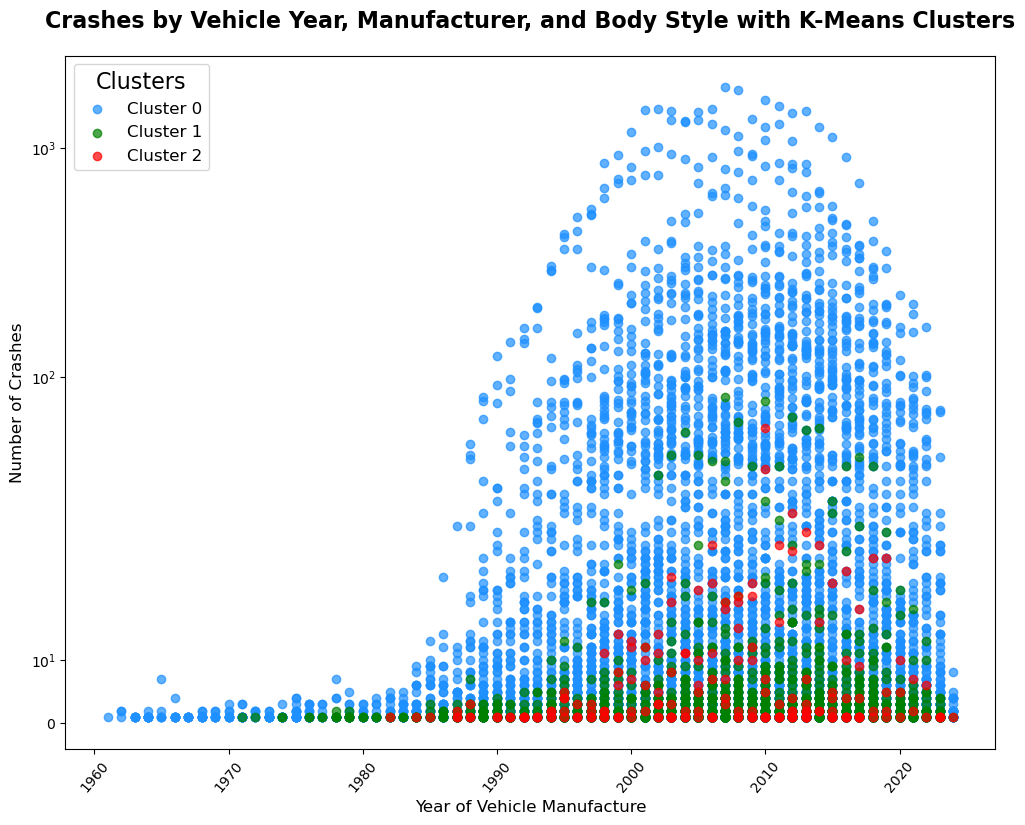

In [398]:
cluster_colors = {
    0: 'dodgerblue',
    1: 'green',
    2: 'red'
}

plt.figure(figsize=(12, 9))

# Plot each cluster separately
for cluster_id, color in cluster_colors.items():
    cluster_data = merged[merged['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['VEHICLE_YEAR_MANUF'],
        cluster_data['CrashCount'],
        color=color,
        label=f'Cluster {cluster_id}',
        alpha=0.7)
    
plt.yscale("symlog", linthresh=40)

plt.xticks(fontsize=10,rotation=50)
plt.yticks(fontsize=10)

plt.xlabel('Year of Vehicle Manufacture', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.title('Crashes by Vehicle Year, Manufacturer, and Body Style with K-Means Clusters', fontsize=16, fontweight='bold', pad=20)

plt.legend(loc='upper left', title="Clusters", title_fontsize=16, fontsize = 12)

plt.savefig('task3_3_scattercolour.png', format='png', dpi=300)

In [210]:
cluster_df = {}

for cluster in range(optimal_k):
    cluster_data = merged[merged['cluster'] == cluster]
    top_10 = cluster_data.sort_values(by='CrashCount', ascending=False).head(10)

    #print(top_10[['VEHICLE_YEAR_MANUF', 'VEHICLE_BODY_STYLE', 'VEHICLE_MAKE', 'CrashCount', 'cluster','NO_OF_WHEELS','NO_OF_CYLINDERS','SEATING_CAPACITY','TARE_WEIGHT','TOTAL_NO_OCCUPANTS']])
    #cluster_df[cluster]=top_10
    
    # Step 7: Save the top 10 data for each cluster into separate CSV files
    #top_10.to_csv(f'task3_3_cluster{cluster}.csv', index=False)